# CSE422 — Loan Approval Prediction Project (Group 04)


## **Introduction:**
This project aims to predict a person's eligibility for loan approval based on the given dataset. Our project's goal is to build a suitable model to predict loan approval by handling class imbalance and optimizing **Accuracy, Precision, Recall, ROC-AUC**.

### Setup:

In [ ]:
!pip install gdown

In [ ]:
import gdown

file_id="1P5MiPpFaMhDHjdVOgV_LP1mFSKhNdYUH"
url=f"https://drive.google.com/uc?id={file_id}"

output="Loan Approval Dataset.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1P5MiPpFaMhDHjdVOgV_LP1mFSKhNdYUH
To: /content/Loan Approval Dataset.csv
100%|██████████| 3.61M/3.61M [00:00<00:00, 25.5MB/s]


'Loan Approval Dataset.csv'

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading dataframe to test the data:

In [ ]:
df=pd.read_csv(output)
print(df.shape)
df.head()

(45000, 14)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## **Problem Definition & Objectives**
- **Task:** Binary classification on `loan_status`.
- **Goal:** Build a robust baseline that handles class imbalance and reports **Accuracy, Precision, Recall, F1, ROC-AUC**.

## **EDA:**

### Data Summary:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
display(df.dtypes)

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [ ]:
display(df.isna().sum())

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
print('Class distribution for loan_status:')
display(df['loan_status'].value_counts())
display(df['loan_status'].value_counts(normalize=True))

quantitative_cols=df.select_dtypes(include=['number']).columns.tolist()
categorical_cols=df.select_dtypes(exclude=['number']).columns.tolist()

print(f"Quantitative features:{quantitative_cols} Total:{len(quantitative_cols)}" )
print(f"Categorical features:{categorical_cols} Total:{len(categorical_cols)}")

Class distribution for loan_status:


,count
loan_status,
0,35000
1,10000


,proportion
loan_status,
0,0.777778
1,0.222222


Quantitative features:['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status'] Total:9
Categorical features:['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'] Total:5


### Summary Statistics:

In [ ]:
quantitative_cols=df.select_dtypes(include=['number'])
quantitative_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [ ]:
categorical_cols=df.select_dtypes(exclude=['number'])
categorical_cols.describe().T

,count,unique,top,freq
person_gender,45000,2,male,24841
person_education,45000,5,Bachelor,13399
person_home_ownership,45000,4,RENT,23443
loan_intent,45000,6,EDUCATION,9153
previous_loan_defaults_on_file,45000,2,Yes,22858


### Variance of each numerical features

In [ ]:
quantitative_cols.var()

,0
person_age,3.654333e+01
person_income,6.467778e+09
person_emp_exp,3.676642e+01
loan_amnt,3.987779e+07
loan_int_rate,8.873299e+00
loan_percent_income,7.605987e-03
cb_person_cred_hist_length,1.505209e+01
credit_score,2.543776e+03
loan_status,1.728433e-01


### Skew in numerical features

In [ ]:
quantitative_cols.skew()

,0
person_age,2.548154
person_income,34.137583
person_emp_exp,2.594917
loan_amnt,1.179731
loan_int_rate,0.213784
loan_percent_income,1.034512
cb_person_cred_hist_length,1.631720
credit_score,-0.610261
loan_status,1.336351


### **Skewness Interpretation:**
- **person_age (2.54):**

Highly positively skewed.

- **person_income (34.13):**

Extremely positively skewed. Vast majority of applicants have low to medium income, while a few very high incomes create a long right tail.

- **person_emp_exp (2.59):**

Strong positive skew. Many applicants have low years of employment experience, with only a few having long careers.

- **loan_amnt (1.18):**

Mild positive skew. Smaller loan amounts are more common; fewer applicants request very large loans.

- **loan_int_rate (0.21):**

Nearly symmetric. Distribution of interest rates is roughly balanced without strong skewness.

- **loan_percent_income (1.03):**

Moderate positive skew. For most applicants, loan installments take a smaller portion of income, while a few face very high percentages.

- **cb_person_cred_hist_length (1.63):**

Positive skew. Majority have shorter credit histories; only a few individuals have very long histories.

- **credit_score (-0.61):**

Slight negative skew. More applicants cluster toward higher credit scores, with a tail extending toward lower scores.

- **loan_status (1.33):**

Positive skew. Indicates an imbalance in approval/rejection classes (likely more approved cases).

### Histogram:

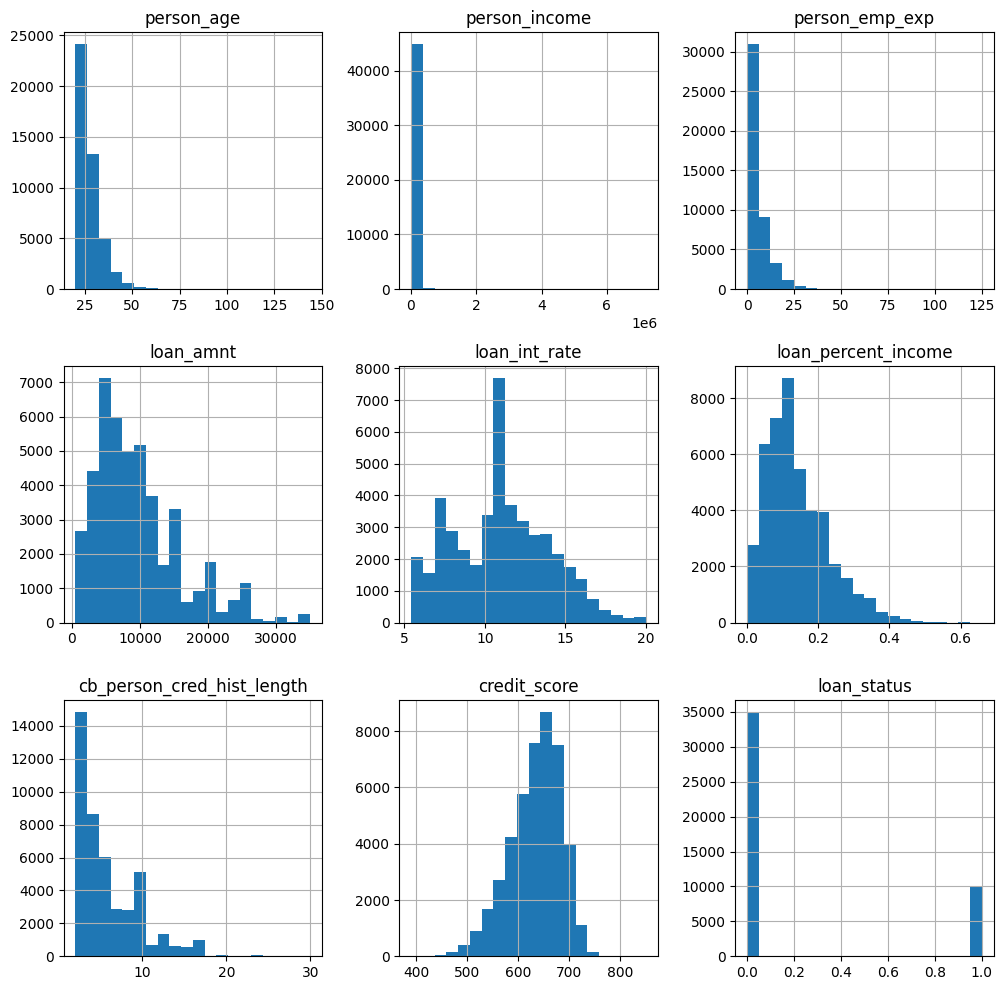

In [ ]:
quantitative_cols.hist(figsize=(12,12),bins=20)
plt.show()

### Unique Values:

In [ ]:
quantitative_cols.nunique()

,0
person_age,60
person_income,33989
person_emp_exp,63
loan_amnt,4483
loan_int_rate,1302
loan_percent_income,64
cb_person_cred_hist_length,29
credit_score,340
loan_status,2


In [ ]:
categorical_cols.nunique()

,0
person_gender,2
person_education,5
person_home_ownership,4
loan_intent,6
previous_loan_defaults_on_file,2


### Barplot of unique value counts in every categorical features

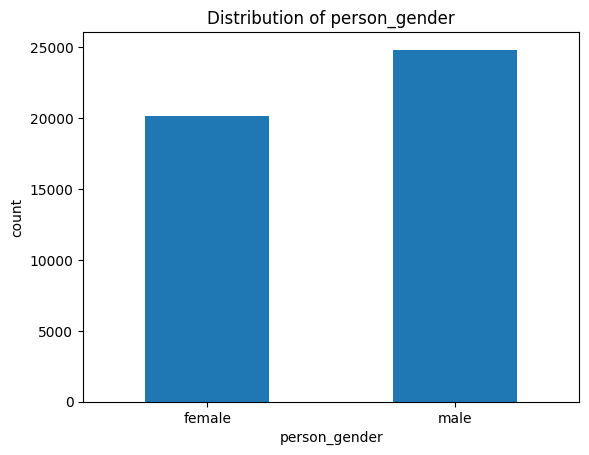

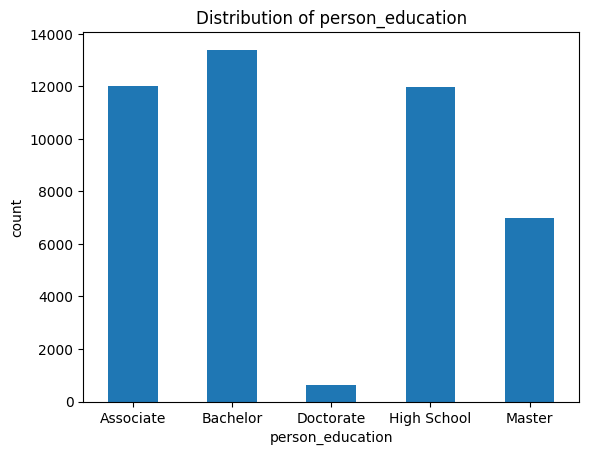

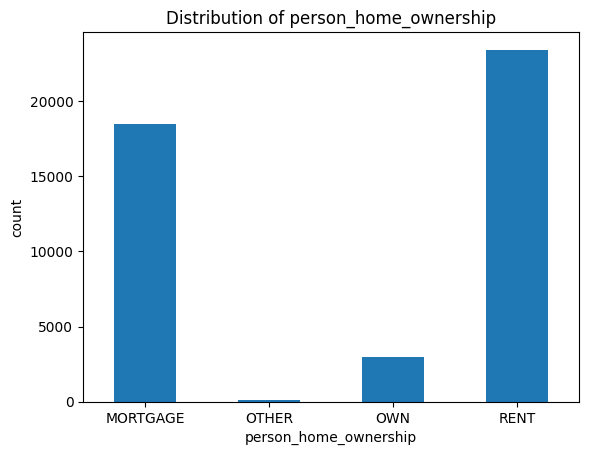

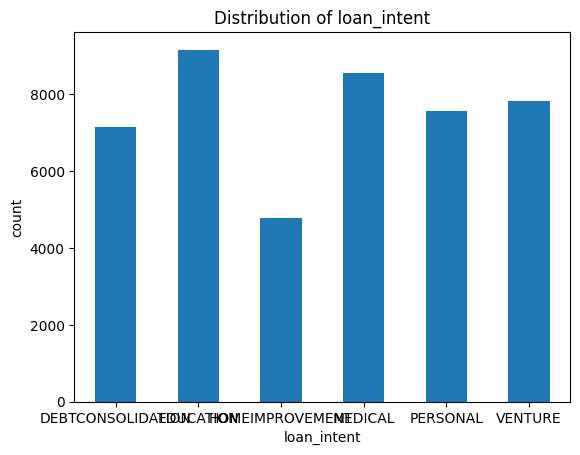

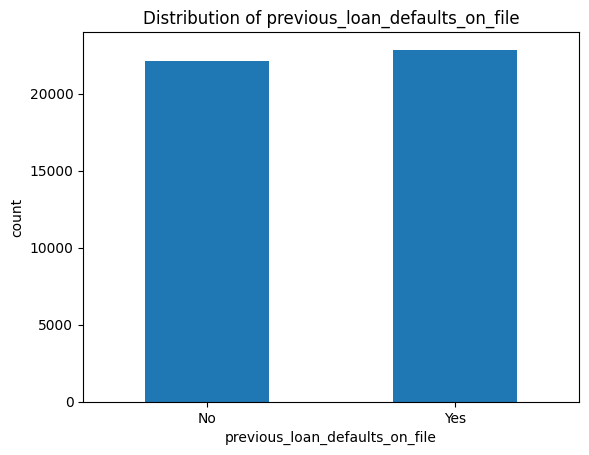

In [ ]:
for col in categorical_cols:
    plt.title(f'Distribution of {col}')
    categorical_cols[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

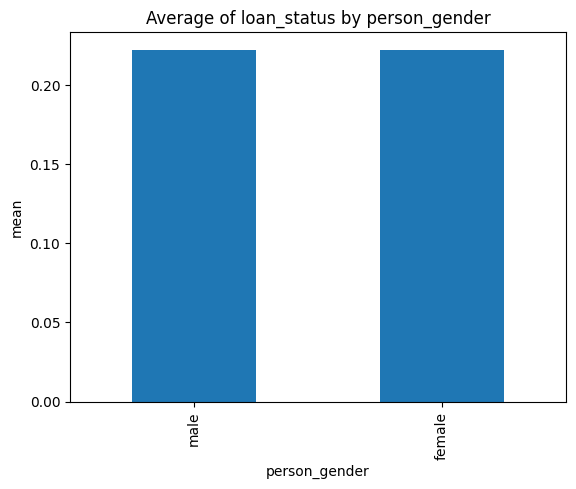

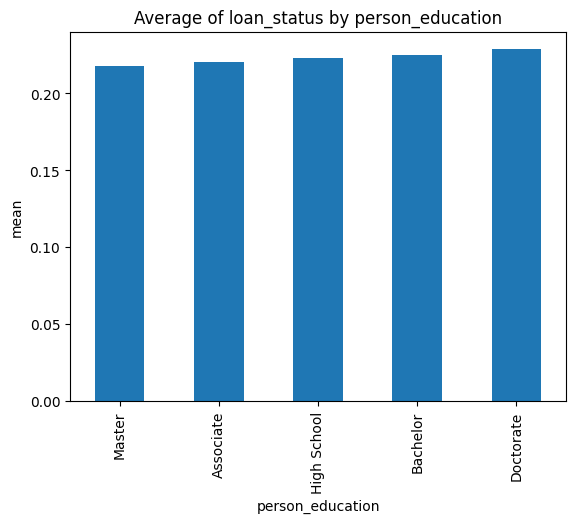

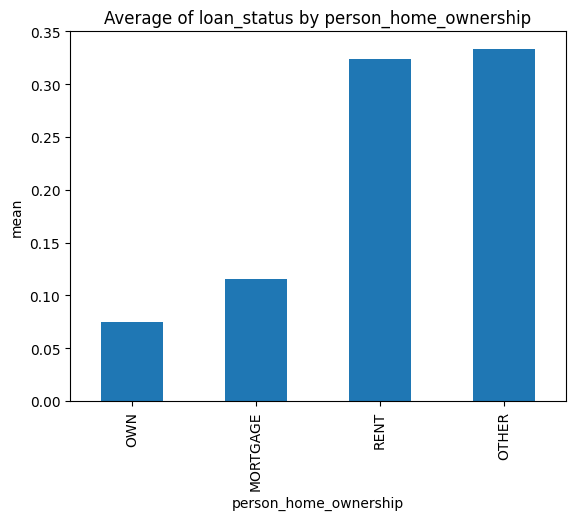

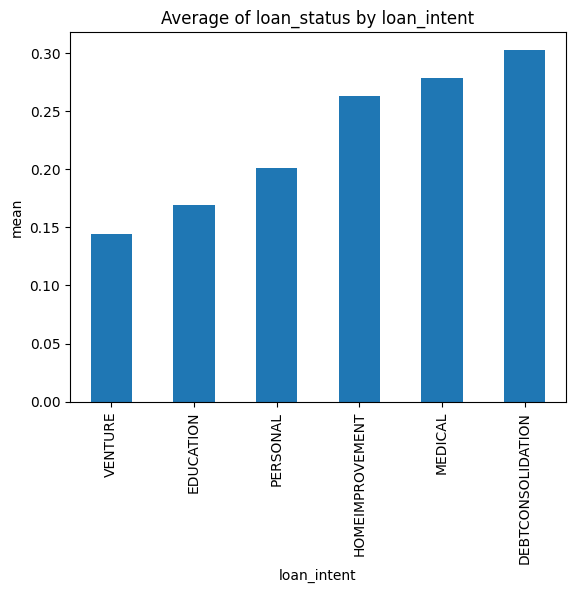

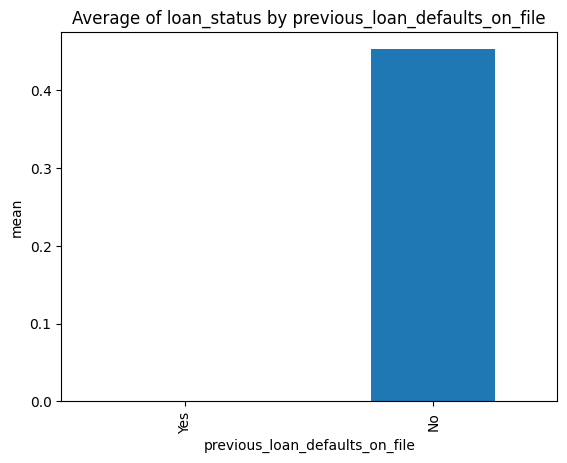

In [ ]:
cat_cols=['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']
for c in cat_cols:
    if c in df.columns:
        ax=df.groupby(c)['loan_status'].mean().sort_values().plot(kind='bar')
        plt.title(f'Average of loan_status by {c}'); plt.ylabel('mean'); plt.show()

### Correlation:

In [ ]:
#correlation matrix
correlation_matrix=quantitative_cols.corr()
correlation_matrix

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


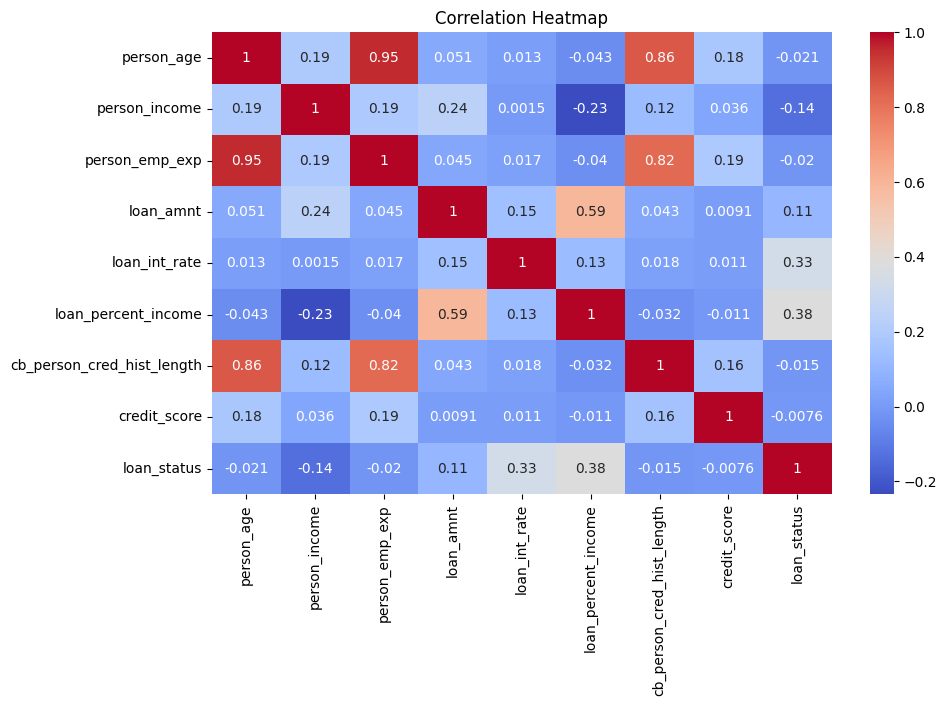

In [ ]:
#for heatmap corelation
corr=df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

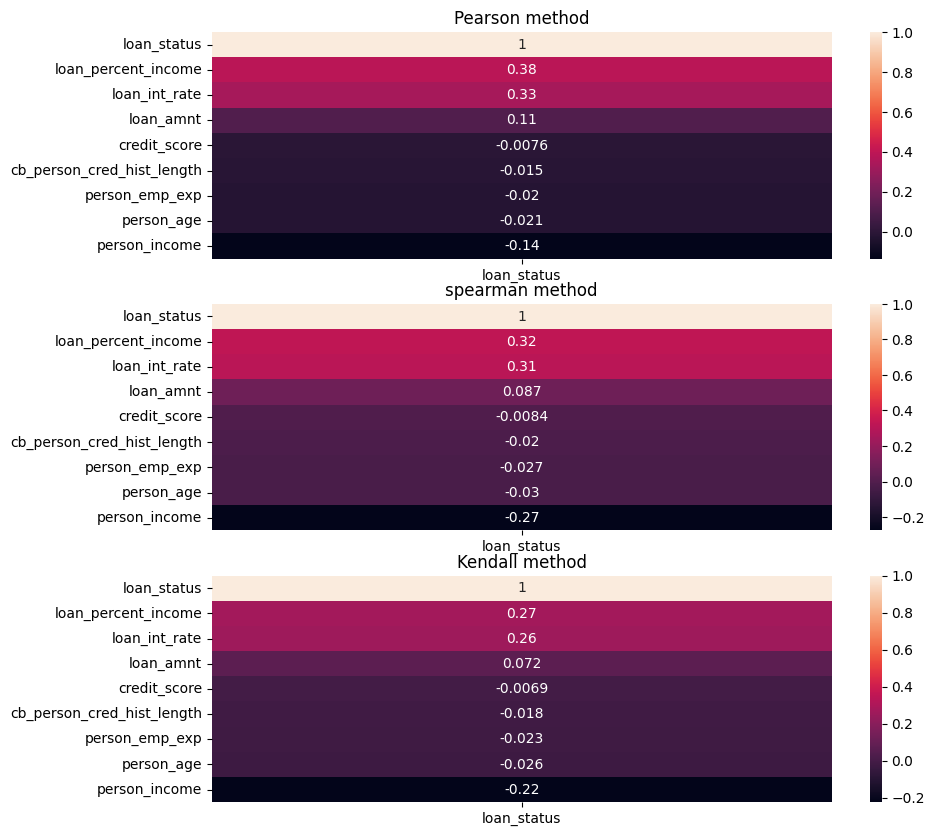

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(10, 10))
## Correlation coefficient using different methods
corr1 = quantitative_cols.corr('pearson')[['loan_status']].sort_values(by='loan_status', ascending=False)
corr2 = quantitative_cols.corr('spearman')[['loan_status']].sort_values(by='loan_status', ascending=False)
corr3 = quantitative_cols.corr('kendall')[['loan_status']].sort_values(by='loan_status', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')

## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

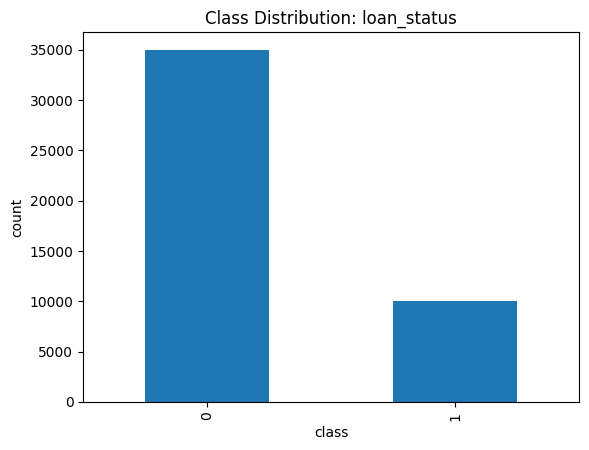

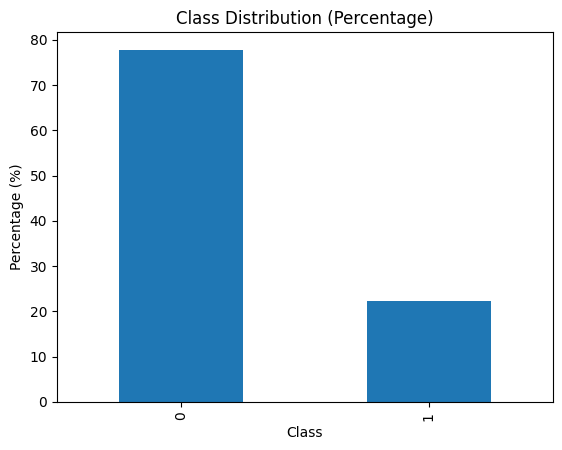

In [ ]:
df['loan_status'].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution: loan_status'); plt.xlabel('class'); plt.ylabel('count'); plt.show()

(df['loan_status'].value_counts(normalize=True) * 100) \
    .sort_index() \
    .plot(kind='bar')

plt.title('Class Distribution (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.show()

## **Data Description:**
- There are **45000 rows** and **14 columns**
- There are **45000 Datapoints**
- Each Datapoint has **13 Features** and **1 Target**
- This is a **Classification Problem.** The dataset contains quantitative and categorical features and we have to predict **`loan_status`** (0/1). As this is a binary classification "Yes" or "No", the problem is a classification problem.
- **Quantitative features:** `person_age`, `person_income`, `person_emp_exp`, `loan_amnt`, `loan_int_rate`, `loan_percent_income`, `cb_person_cred_hist_length`, `credit_score`, `loan_status`
- **Quantitative features:** `person_gender`, `person_education`, `person_home_ownership`, `loan_intent`, `previous_loan_defaults_on_file`
- Yes, we need to **encode categorical variables**. We cannot work with string categories like `"male", "female", "OWN", "RENT"`. We have not convert them into numeric representations. Thus we need to encode categorical variables. In this project, we are using **One-Hot Encoding** algorithm to encode categorical variables.
- From the correlatuion heatmap, we see that `loan_percent_income`, `loan_amnt` and `loan_int_rate` have stronger positive correlation with `loan_status`. On the other hand, `person_income` and `credit_score` have negative correlation. This indicates that applicants with higher interest rates or higher percent of income going into loan are more likely to be classified as 1, while higher income or credit score lowers that probability. Many other features show weak correlations, suggesting they may not individually influence the target strongly.
- There is a class distribution imbalance. There are **35000** datapoints for `loan status=0` and **10000** datapoints for `loan status=1`. The perntage of loan not approved vs approved is **78% vs 22%**.

## **Dataset Pre-processing:**

In [ ]:
target='loan_status'
X=df.drop(columns=[target])
y=df[target].astype(int)
print(target)

loan_status


#### **For missing values:**

In [ ]:
na=df.isna().sum().sort_values(ascending=False).to_frame("missing_count")
na["missing_percent"]=(na["missing_count"] / len(df) * 100).round(2)
display(na)

,missing_count,missing_percent
person_age,0,0.0
person_gender,0,0.0
person_education,0,0.0
person_income,0,0.0
person_emp_exp,0,0.0
person_home_ownership,0,0.0
loan_amnt,0,0.0
loan_intent,0,0.0
loan_int_rate,0,0.0
loan_percent_income,0,0.0


Dropping columns with > 40.0 % missing: []
New shape after dropping columns: (45000, 14)
Rows with missing values:0 (0.00%)
Dropped rows with missing values. New shape:
 (45000, 14)
Any missing values left?
 0


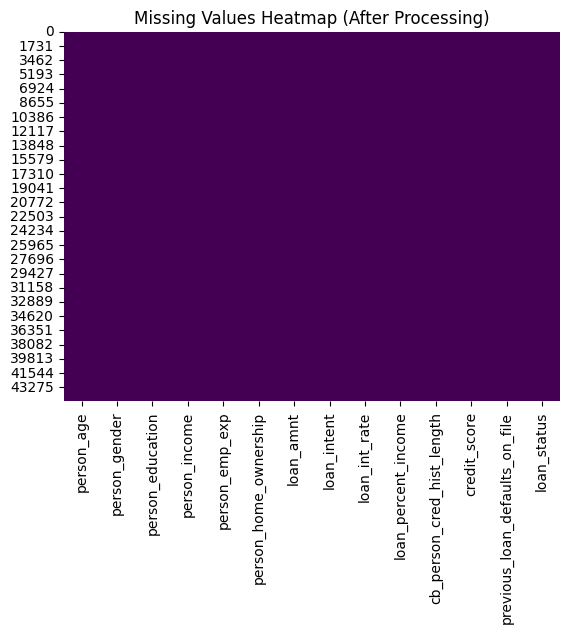

In [ ]:
thresh = 40.0  # percentage
cols_to_drop = na[na["missing_percent"] > thresh].index.tolist()
#drop columns with more than 40% missing datapoints
print("Dropping columns with >", thresh, "% missing:", cols_to_drop)
df=df.drop(columns=cols_to_drop)
print("New shape after dropping columns:", df.shape)

# Only drop rows if missing < 5% of dataset
rows_with_missing=df.isnull().any(axis=1).sum()
percent_missing_rows=(rows_with_missing / len(df)) * 100
print(f"Rows with missing values:{rows_with_missing} ({percent_missing_rows:.2f}%)")
if percent_missing_rows<5:
    df=df.dropna(axis=0, how='any')
    print("Dropped rows with missing values. New shape:\n", df.shape)
else:
    print("Too many rows missing, better to impute instead of dropping.")

#Imputation
from sklearn.impute import SimpleImputer
num_cols=df.select_dtypes(include=[np.number]).columns
cat_cols=df.select_dtypes(include=["object","category"]).columns

# Numerical : fill with mean
imputer_mean=SimpleImputer(strategy="mean")
df[num_cols]=imputer_mean.fit_transform(df[num_cols])

# Categorical → fill with mode (most frequent)
imputer_mode=SimpleImputer(strategy="most_frequent")
df[cat_cols]=imputer_mode.fit_transform(df[cat_cols])

# Step 4: Double-check
print("Any missing values left?\n", df.isnull().sum().sum())

# Step 5: Visualization of missing values (before dropping/imputation)
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (After Processing)")
plt.show()

#### **Categorical Values:**

In [ ]:
cat_cols=X.select_dtypes(include=["object","category"]).columns.tolist()
num_cols=X.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical columns:", len(cat_cols), cat_cols[:10])
print("Numeric columns:", len(num_cols), num_cols[:10])

cat_preview=(
    X[cat_cols]
    .nunique()
    .sort_values(ascending=False)
    .to_frame("unique_levels")
)
print("For Categorical Values:")
display(cat_preview)

Categorical columns: 5 ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numeric columns: 8 ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
For Categorical Values:


,unique_levels
loan_intent,6
person_education,5
person_home_ownership,4
person_gender,2
previous_loan_defaults_on_file,2


In [ ]:
#Solving by One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
X_encoded=pd.get_dummies(X,columns=cat_cols, drop_first=True)
print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)

# Preview encoded columns
print("Encoded columns preview:", X_encoded.columns[:15].tolist())


Shape before encoding: (45000, 13)
Shape after encoding: (45000, 22)
Encoded columns preview: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'person_gender_male', 'person_education_Bachelor', 'person_education_Doctorate', 'person_education_High School', 'person_education_Master', 'person_home_ownership_OTHER', 'person_home_ownership_OWN']


#### **For Skewed numeric features:**

In [ ]:
sk=X[num_cols].skew().sort_values(ascending=False)
display(sk)

,0
person_income,34.137583
person_emp_exp,2.594917
person_age,2.548154
cb_person_cred_hist_length,1.631720
loan_amnt,1.179731
loan_percent_income,1.034512
loan_int_rate,0.213784
credit_score,-0.610261


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

new_numeric_cols=X_encoded.select_dtypes(include=[np.number]).columns.tolist()

binary_like_cols=[]
for c in new_numeric_cols:
    vals=pd.unique(X_encoded[c].dropna())
    if len(vals)<=2 and set(vals).issubset({0, 1}):
        binary_like_cols.append(c)

scale_cols=[c for c in new_numeric_cols if c not in binary_like_cols]

print(f"Total numeric columns: {len(new_numeric_cols)}")
print(f"Binary/dummy columns (kept unscaled): {len(binary_like_cols)}")
print(f"Continuous columns to scale: {len(scale_cols)}")
print(scale_cols[:15], "..." if len(scale_cols) > 15 else "")


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.20, random_state=42,
)
print("Train:", X_train.shape, " Test:", X_test.shape)



scaler=StandardScaler()

X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()

X_train_scaled[scale_cols]=scaler.fit_transform(X_train[scale_cols])
X_test_scaled[scale_cols]=scaler.transform(X_test[scale_cols])

#check
print("\nSanity check on a few scaled columns:")
check_cols = scale_cols[:5]
print("Train means (first 5 cols):\n", X_train_scaled[check_cols].mean().round(3))
print("Train stds  (first 5 cols):\n", X_train_scaled[check_cols].std().round(3))

Total numeric columns: 8
Binary/dummy columns (kept unscaled): 0
Continuous columns to scale: 8
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'] 
Train: (36000, 22)  Test: (9000, 22)

Sanity check on a few scaled columns:
Train means (first 5 cols):
 person_age       -0.0
person_income    -0.0
person_emp_exp   -0.0
loan_amnt         0.0
loan_int_rate     0.0
dtype: float64
Train stds  (first 5 cols):
 person_age        1.0
person_income     1.0
person_emp_exp    1.0
loan_amnt         1.0
loan_int_rate     1.0
dtype: float64


## **Model Training and Testing (Supervised):**

In [ ]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

results = []

def log_and_store_metrics(model_name, y_true, y_pred, y_prob=None):
    acc=accuracy_score(y_true, y_pred)
    prec=precision_score(y_true, y_pred)
    rec=recall_score(y_true, y_pred)
    f1=f1_score(y_true, y_pred)
    auc=roc_auc_score(y_true, y_prob) if y_prob is not None else np.nan
    results.append({"model": model_name, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc})
    print(f"{model_name} Performance:")
    print(f"Accuracy:{acc:.3f}, Precision:{prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}, AUC: {auc:.3f}\n")


## **Logistic Regression**

Logistic Regression Performance:
Accuracy:0.894, Precision:0.775, Recall: 0.741, F1: 0.758, AUC: 0.953



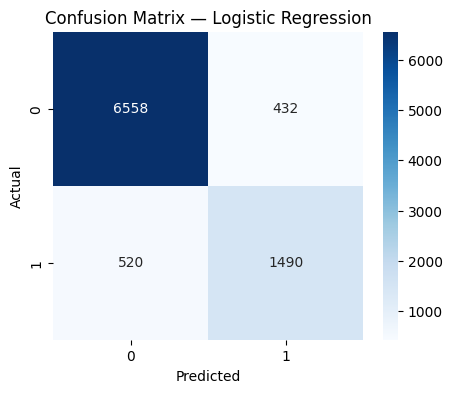

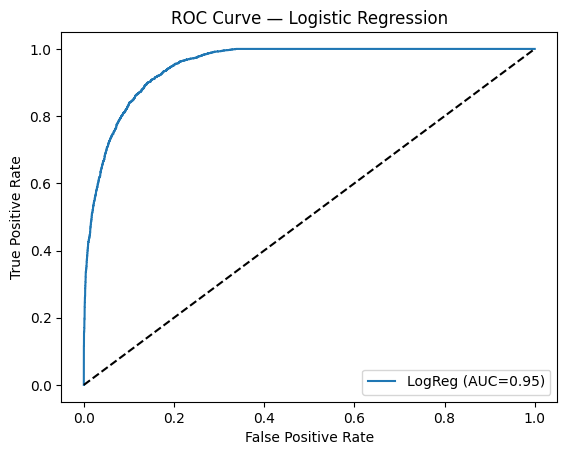

In [ ]:
# Logistic Regression (classification)
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log=log_reg.predict(X_test_scaled)
y_prob_log=log_reg.predict_proba(X_test_scaled)[:,1]

# Metrics
log_and_store_metrics("Logistic Regression",y_test,y_pred_log,y_prob_log)

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, th=roc_curve(y_test, y_prob_log)
plt.figure()
plt.plot(fpr, tpr, label=f"LogReg (AUC={roc_auc_score(y_test, y_prob_log):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend(); plt.show()

## **Decision Tree:**

Decision Tree Performance:
Accuracy:0.897, Precision:0.765, Recall: 0.779, F1: 0.772, AUC: 0.855



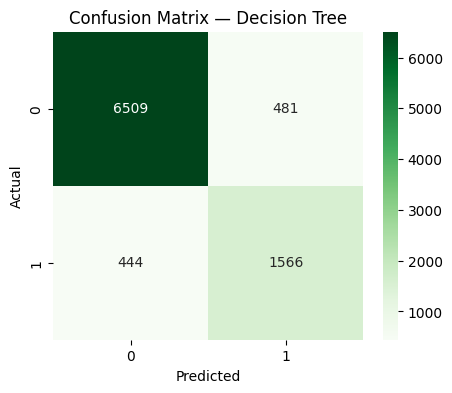

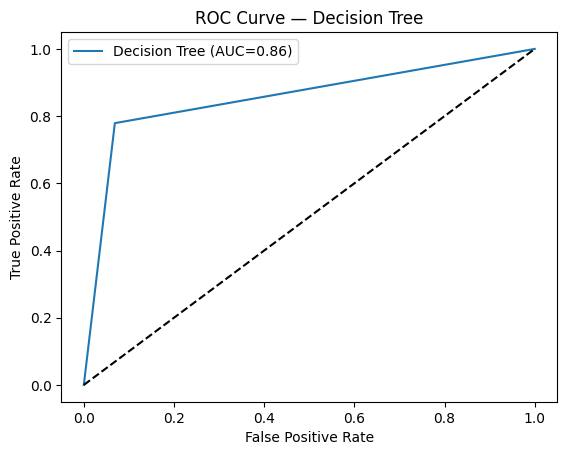

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)
dt.fit(X_train_scaled, y_train)

# Predictions (labels + probabilities)
y_pred_dt = dt.predict(X_test_scaled)
# Probabilities needed for ROC/AUC
y_prob_dt = dt.predict_proba(X_test_scaled)[:,1]

#  Metrics
log_and_store_metrics("Decision Tree", y_test, y_pred_dt, y_prob_dt)

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix — Decision Tree")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={auc_dt:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Decision Tree")
plt.legend(); plt.show()

Neural Network (MLP) Performance:
Accuracy:0.919, Precision:0.864, Recall: 0.754, F1: 0.806, AUC: 0.967



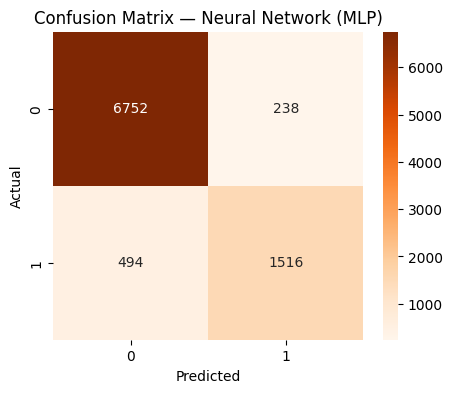

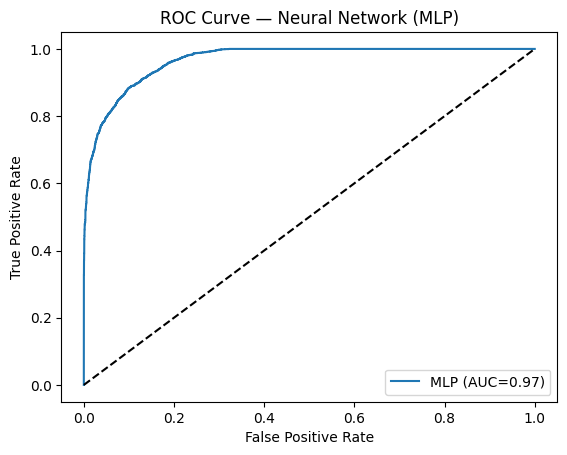

In [ ]:
# Neural Network (MLPClassifier)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64,32),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    batch_size=256,
    learning_rate_init=1e-3,
    max_iter=200,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    tol=1e-4,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)
y_prob_mlp = mlp.predict_proba(X_test_scaled)[:, 1]

log_and_store_metrics("Neural Network (MLP)", y_test, y_pred_mlp, y_prob_mlp)

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix — Neural Network (MLP)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_mlp)
plt.figure()
plt.plot(fpr, tpr, label=f"MLP (AUC={roc_auc_score(y_test, y_prob_mlp):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Neural Network (MLP)")
plt.legend(); plt.show()


## **Model Comparison Analysis**

,model,acc,prec,rec,f1,auc
0,Logistic Regression,0.894,0.775,0.741,0.758,0.953
1,Decision Tree,0.897,0.765,0.779,0.772,0.855
2,Neural Network (MLP),0.919,0.864,0.754,0.806,0.967


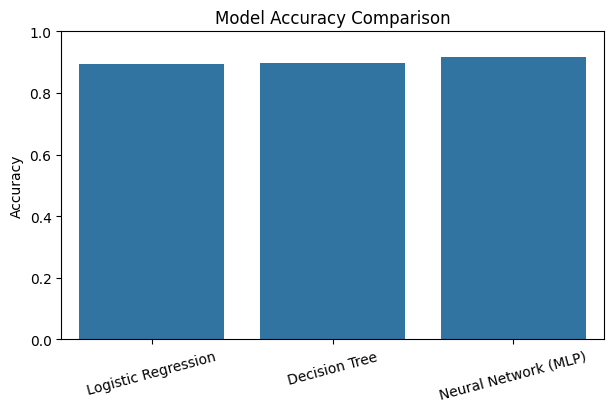

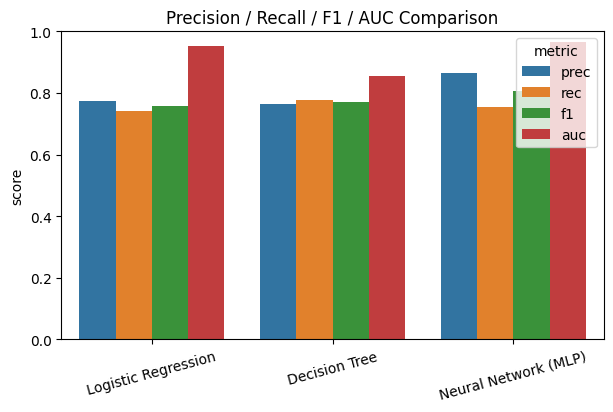

In [ ]:
#  comparison dataframe
res_df = pd.DataFrame(results)
display(res_df.style.format({"acc":"{:.3f}","prec":"{:.3f}","rec":"{:.3f}","f1":"{:.3f}","auc":"{:.3f}"}))

# Bar chart: Accuracy
plt.figure(figsize=(7,4))
sns.barplot(x="model", y="acc", data=res_df)
plt.title("Model Accuracy Comparison")
plt.ylim(0,1); plt.ylabel("Accuracy"); plt.xlabel("")
plt.xticks(rotation=15)
plt.show()

# Bar chart: Precision & Recall (side-by-side)
plt.figure(figsize=(7,4))
res_melt = res_df.melt(id_vars="model", value_vars=["prec","rec","f1","auc"], var_name="metric", value_name="score")
sns.barplot(x="model", y="score", hue="metric", data=res_melt)
plt.title("Precision / Recall / F1 / AUC Comparison")
plt.ylim(0,1); plt.xlabel(""); plt.xticks(rotation=15)
plt.show()

## **Unsupervised K Means Clustering:**

K-Means (k=2) — evaluation vs. true labels (for reference):
Accuracy (best-aligned): 0.642
Precision: 0.201
Recall: 0.202
F1: 0.202
Silhouette Score (train): 0.24


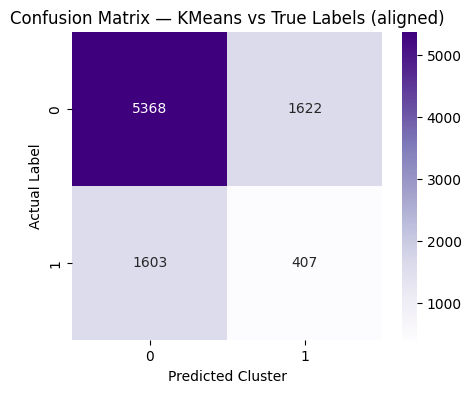

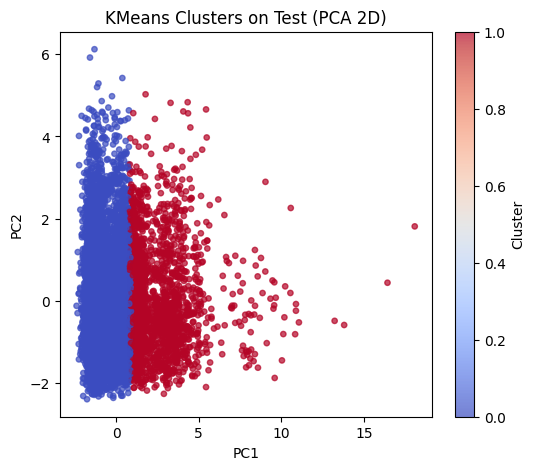

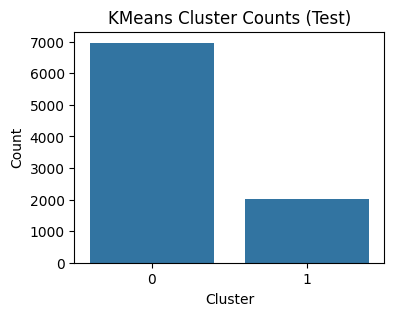

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Fit KMeans on TRAIN (unsupervised)
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X_train_scaled)

# 2) Predict clusters on TEST
test_clusters = kmeans.predict(X_test_scaled)

# 3) Align cluster labels with ground truth
acc_without_flip = accuracy_score(y_test, test_clusters)
acc_with_flip    = accuracy_score(y_test, 1 - test_clusters)
if acc_with_flip > acc_without_flip:
    test_clusters = 1 - test_clusters  # flip cluster IDs

# 4) Evaluate clustering (vs true labels, just for reference)
cm_km = confusion_matrix(y_test, test_clusters)
sil_train = silhouette_score(X_train_scaled, kmeans.labels_)  # silhouette on training data

print("K-Means (k=2) — evaluation vs. true labels (for reference):")
print("Accuracy (best-aligned):", round(accuracy_score(y_test, test_clusters), 3))
print("Precision:", round(precision_score(y_test, test_clusters), 3))
print("Recall:", round(recall_score(y_test, test_clusters), 3))
print("F1:", round(f1_score(y_test, test_clusters), 3))
print("Silhouette Score (train):", round(sil_train, 3))

# 5) Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_km, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix — KMeans vs True Labels (aligned)")
plt.xlabel("Predicted Cluster"); plt.ylabel("Actual Label")
plt.show()

# 6) PCA Visualization (reduce to 2D)
pca = PCA(n_components=2, random_state=42)
X_test_pca2 = pca.fit_transform(X_test_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_test_pca2[:,0], X_test_pca2[:,1], c=test_clusters, s=15, alpha=0.7, cmap="coolwarm")
plt.title("KMeans Clusters on Test (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

# 7) Cluster sizes bar plot (on test set)
plt.figure(figsize=(4,3))
sns.countplot(x=test_clusters)
plt.title("KMeans Cluster Counts (Test)")
plt.xlabel("Cluster"); plt.ylabel("Count")
plt.show()

## **Conclusion:**

In [ ]:

best = pd.DataFrame(results).sort_values("acc", ascending=False).iloc[0]
print(f"Best supervised model by Accuracy: {best['model']} "
      f"(Acc={best['acc']:.3f}, Prec={best['prec']:.3f}, Rec={best['rec']:.3f}, F1={best['f1']:.3f}, AUC={best['auc']:.3f})")

Best supervised model by Accuracy: Neural Network (MLP) (Acc=0.919, Prec=0.864, Rec=0.754, F1=0.806, AUC=0.967)
